# Training a digit classification ML model on the mnist dataset

## Importing all neccesary libraries:

In [53]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Selecting Nvida GPU as device:

In [54]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print(device) # check wether gpu was found

cuda


## Defining Hyperparameters

In [ ]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 3
batch_size = 100
learning_rate = 0.001

##### Loading the features (in thise case image pixels) and outcome (in this case the labels of the digits) into x and y

In [55]:
x, y = torch.load('MNIST/processed/training.pt') # Downloaded File 

##### Checking wether the data loaded correctly

In [56]:
x.shape

torch.Size([60000, 28, 28])

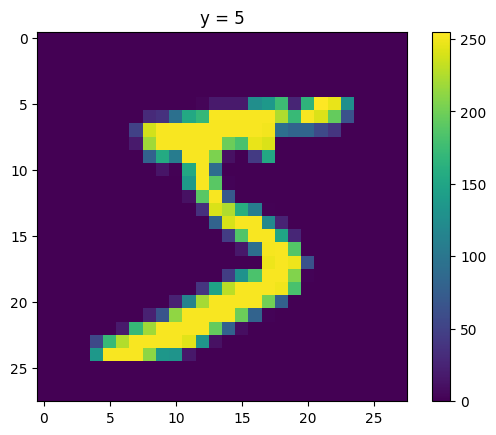

In [57]:
plt.imshow(x[0].numpy())
plt.title(f'y = {y[0].numpy()}')

plt.colorbar()
plt.show()

## Data Handling:

##### DataSet Object

In [66]:
class MyDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        
        # Normalizing the values to [0,1]
        self.x = self.x / 255. 
        
        # One Hot Encoding the class labels as they are nominal:
        self.y = F.one_hot(self.y, num_classes=10).to(float) 
        
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, i): 
        return self.x[i], self.y[i]

#### Loading Training Set and Data Set

In [67]:
training_set = MyDataset('MNIST/processed/training.pt')
test_set = MyDataset('MNIST/processed/test.pt')

In [68]:
print(len(training_set))
print(len(test_set))

60000
10000


#### DataLoader

In [69]:
training_loader = DataLoader(training_set, batch_size=5)

## Loss Function

In [70]:
L = nn.CrossEntropyLoss()

## Neural Network Architecture

In [71]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [72]:
f = MyNeuralNet()

## Training Loop

In [ ]:
def train_model(dl, f, n_epochs=12):
    # Stochastic Gradient Descent Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Training Loop
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            loss_value.backward() 
            opt.step() 
            
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
            
    return np.array(epochs), np.array(losses)